In [33]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open("iou_val.json", "r") as fp:
    iou_val = json.load(fp)


ids = np.array([k for k,v in iou_val.items()])
iou = {}
for config in [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]:
    iou[config] = np.array([v[str(config)] for k,v in iou_val.items()])
    
index = np.argsort(iou[44])

for k in iou:
    iou[k] = iou[k][index]
    

['2923' '2592' '2587' '5529']


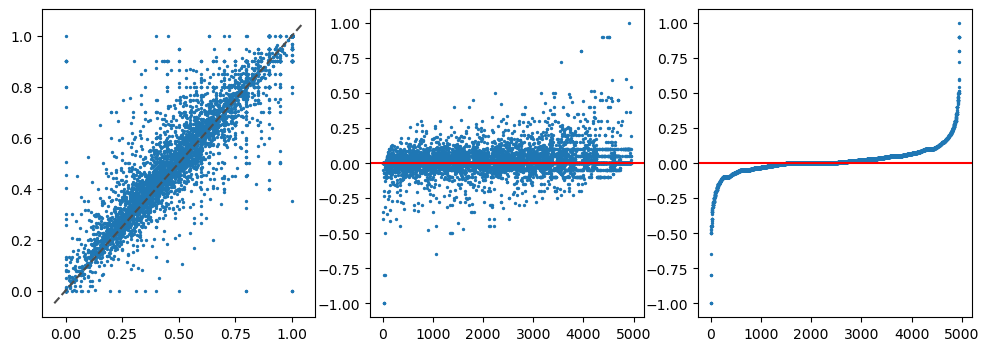

In [34]:
f, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].scatter(iou[14], iou[44], s=2)
diag_line, = ax[0].plot(ax[0].get_xlim(), ax[0].get_ylim(), ls="--", c=".3")


ax[1].scatter(range(len(iou[44])), iou[44]-iou[14], s=2)
ax[1].axhline(y=0, color='r', linestyle='-')

ax[2].scatter(range(len(iou[44])), np.sort(iou[44]-iou[14]), s=2)
ax[2].axhline(y=0, color='r', linestyle='-')

order = np.argsort(iou[44]-iou[14])
print(ids[order][0:4])

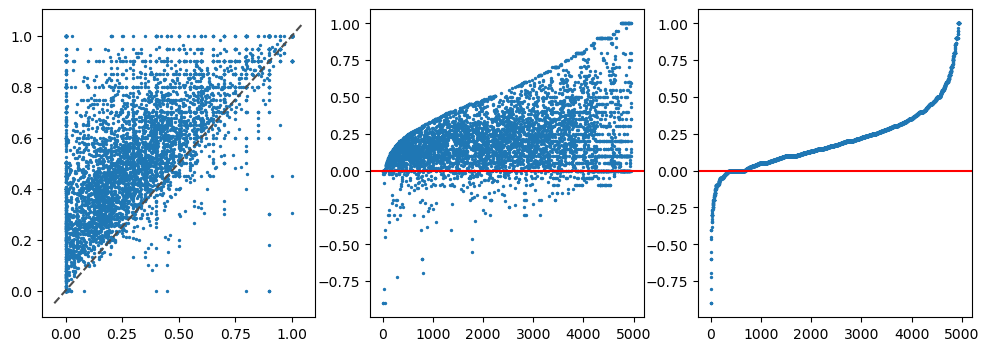

In [30]:
f, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].scatter(iou[41], iou[44], s=2)
diag_line, = ax[0].plot(ax[0].get_xlim(), ax[0].get_ylim(), ls="--", c=".3")


ax[1].scatter(range(len(iou[44])), iou[44]-iou[41], s=2)
ax[1].axhline(y=0, color='r', linestyle='-')

ax[2].scatter(range(len(iou[44])), np.sort(iou[44]-iou[41]), s=2)
ax[2].axhline(y=0, color='r', linestyle='-')